# Data Wrangling


In [155]:
import warnings

warnings.simplefilter("ignore" , UserWarning)
warnings.simplefilter("ignore" , FutureWarning)
warnings.simplefilter("ignore" , DeprecationWarning)

In [156]:
import os
import pandas as pd

dataset="balanced.csv"

if os.path.isfile(dataset):
    df=pd.read_csv("balanced.csv")
else:{
print("File not found")}

display(df)

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1,polarity,polarity_class
0,Unstable for large books,1,this calls for less than 20 lbs and a max dept...,0,call less lb max depth book book lb less see s...,bad,"['max', 'depth', 'book', 'book', 'signific', '...",-0.055556,negative
1,Get the large set,3,go ahead and buy the large set the small set o...,1,go ahead buy larg set small set paperback imoi...,moderate,"['ahead', 'buy', 'larg', 'set', 'small', 'set'...",-0.300000,negative
2,Measure your books before buying this,1,the bookholder platform on the large size book...,0,bookhold platform larg size bookshelf big stan...,bad,"['bookhold', 'platform', 'larg', 'size', 'book...",0.225000,positive
3,WILL NOT FIT NORMAL HARDCOVER BOOKS!!,2,be forewarned these shelves do not fit a stand...,0,forewarn shelv fit standard hardcov book even ...,bad,"['forewarn', 'shelv', 'fit', 'standard', 'hard...",0.165152,positive
4,Disappointed,2,i was so excited when buying this but after ha...,0,excit buy hang place son book disappoint suppo...,bad,"['excit', 'buy', 'hang', 'place', 'son', 'book...",0.200000,positive
...,...,...,...,...,...,...,...,...,...
200,Five Stars,5,easy to install looks great,2,easi instal look great,good,"['easi', 'instal', 'look', 'great']",0.800000,positive
201,Four Stars,4,unusual and a great accent prop,2,unusu great accent prop,good,"['unusu', 'great', 'accent', 'prop']",0.800000,positive
202,Were very easy to install even though instruct...,5,exactly as described and shown in the photos w...,2,exactli describ shown photo easi instal even t...,good,"['exactli', 'describ', 'show', 'photo', 'easi'...",0.800000,positive
203,great decorative addition,5,these look great,2,look great,good,"['look', 'great']",0.800000,positive


In [157]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              205 non-null    object 
 1   rating             205 non-null    int64  
 2   body               205 non-null    object 
 3   y                  205 non-null    int64  
 4   cleaned_reviews    205 non-null    object 
 5   classes            205 non-null    object 
 6   cleaned_reviews_1  205 non-null    object 
 7   polarity           205 non-null    float64
 8   polarity_class     205 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.5+ KB
None


In [158]:
review=df["cleaned_reviews"].iloc[1]
review

'go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin'

# NLP PreProcessing

HTML Entities

Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by &# and suffixed by ;. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These HTML Entities can be decoded by importing the html library.

In [159]:
import html

decoded_review=html.unescape(review)
decoded_review

'go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin'

Since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. The output series preprocessed is our reviewText but without the special characters.

In [160]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"]=df["cleaned_reviews"].str.replace(pat=pattern , repl="", regex=True)

df["preprocessed"].iloc[1]

'go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin'

In [161]:
df

,title,rating,body,y,cleaned_reviews,classes,cleaned_reviews_1,polarity,polarity_class,preprocessed
0,Unstable for large books,1,this calls for less than 20 lbs and a max dept...,0,call less lb max depth book book lb less see s...,bad,"['max', 'depth', 'book', 'book', 'signific', '...",-0.055556,negative,call less lb max depth book book lb less see s...
1,Get the large set,3,go ahead and buy the large set the small set o...,1,go ahead buy larg set small set paperback imoi...,moderate,"['ahead', 'buy', 'larg', 'set', 'small', 'set'...",-0.300000,negative,go ahead buy larg set small set paperback imoi...
2,Measure your books before buying this,1,the bookholder platform on the large size book...,0,bookhold platform larg size bookshelf big stan...,bad,"['bookhold', 'platform', 'larg', 'size', 'book...",0.225000,positive,bookhold platform larg size bookshelf big stan...
3,WILL NOT FIT NORMAL HARDCOVER BOOKS!!,2,be forewarned these shelves do not fit a stand...,0,forewarn shelv fit standard hardcov book even ...,bad,"['forewarn', 'shelv', 'fit', 'standard', 'hard...",0.165152,positive,forewarn shelv fit standard hardcov book even ...
4,Disappointed,2,i was so excited when buying this but after ha...,0,excit buy hang place son book disappoint suppo...,bad,"['excit', 'buy', 'hang', 'place', 'son', 'book...",0.200000,positive,excit buy hang place son book disappoint suppo...
...,...,...,...,...,...,...,...,...,...,...
200,Five Stars,5,easy to install looks great,2,easi instal look great,good,"['easi', 'instal', 'look', 'great']",0.800000,positive,easi instal look great
201,Four Stars,4,unusual and a great accent prop,2,unusu great accent prop,good,"['unusu', 'great', 'accent', 'prop']",0.800000,positive,unusu great accent prop
202,Were very easy to install even though instruct...,5,exactly as described and shown in the photos w...,2,exactli describ shown photo easi instal even t...,good,"['exactli', 'describ', 'show', 'photo', 'easi'...",0.800000,positive,exactli describ shown photo easi instal even t...
203,great decorative addition,5,these look great,2,look great,good,"['look', 'great']",0.800000,positive,look great


Extracting the root word

How often a word is used is key information in natural language processing. It is therefore important to reduce words to their root form. An example would be the usage of the word "learn". If we differentiate this base form from a modified version like "learning" then we might lose relational context between two documents that have used either word.

We'll be using Lemmatization to reduce tokens to their base word. This technique takes into account context similarity according to part-of-speech anatomy. Stemming is another common approach, although stemming only performs truncation and would not be able to reduce "taught" to "teach".

We will be using the WordNetLemmatizer from the Natural Language Toolkit (or NLTK). Lemmatization only applies to each word but it is dependent on sentence structure to understand context. We therefore need to have part-of-speech tags associated with each word. Our output is derived from applying the lemmatize_doc function to our preprocessed column.

The lemmatize_doc works as follows:

Each review is broken down into a list of sentences

Punctuations that only group words or separate sentences (hyphens therefore are excluded) are removed (replaced by whitespace) using RegEx

Every sentence is further broken down into words (tokens

Each of the sentences then becomes an ordered bag of words. Every word is then tagged to a part-of-speech. This word-tag tuple pair is then fed one at a time to the lemmatize_word function, which works as follows:

Only modifiable words – nouns, verbs, adjectives, and adverbs – can be reduced to roots

These words are lemmatized and appended to the root list

Words that are not modifiable are added as they are to the root list

The output lists are linked together as a string using whitespace. In the end, each preprocessed review will retain its text form but with each word simplified as much as possible.

In [162]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources=["wordnet" ,"stopword" ,"punkt" ,"averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
            nltk.download(resource)
            
#create Lemmatizer object
lemma=WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root=[]
    for token in tagged_token:
        tag= token[1][0]
        word=token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root
def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
#df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row)


                                              
print(df["preprocessed"].iloc[1])

go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin
Wall time: 219 ms


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


Removing Punctuations

The preprocessed reviews are further cleaned by dropping punctuations. Using regular expressions, only whitespaces and alphanumeric characters are kept.

In [163]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin


Converting to Lower Case

In [164]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[1])

go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin


Removing Stop Words

Stop words consist of the most commonly used words that include pronouns (e.g. us, she, their), articles (e.g. the), and prepositions (e.g. under, from, off). These words are not helpful in distinguishing a document from another and are therefore dropped.


Note that the stop_words were stripped of punctuations just as what we have done to our dataset.



In [165]:
#some work around
#i was getting error 'float' object has no attribute 'split' so i have to google it  
#df['preprocessed'] = df['preprocessed'].apply(lambda x: "".join(x.lower() for x in str(x).split() \
                                  #  if x not in stop_words))

In [166]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[1])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing Extra Spaces

Again, we make use of regular expressions to ensure we never get more than a single whitespace to separate words in our sentences.


In [167]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

go ahead buy larg set small set paperback imoi instal stud hardcov book start wobblesolid design small thin


Tokenization

The entries for the preprocessed column are extracted to make up our corpora, which is simply a collection of all our documents. Each review is then transformed into an ordered list of words. This is the process of tokenization – the document is broken down into individual words or tokens.

Our tokenized sample review is below:


In [168]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[1])

['go', 'ahead', 'buy', 'larg', 'set', 'small', 'set', 'paperback', 'imoi', 'instal', 'stud', 'hardcov', 'book', 'start', 'wobblesolid', 'design', 'small', 'thin']


Phrase Modeling

Since order of words matter in most NLP models, it is often helpful to group neighboring words that appear to convey one meaning as though they are a single word, like smart TV.

To be considered a phrase, the number of times that two words should appear next to each other is set to at least 300. The threshold then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [169]:

from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

Unigrams

Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample:

In [170]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['import', 'wast', 'manufactur', 'regardless', 'paper', 'make', 'elegantli', 'decor', 'involv', 'seen', 'somehow', 'bracket', 'hole', 'bare', 'known', 'definit', 'store', 'didt', 'book', 'found', 'tini', 'lip', 'ideal', 'obviou', 'lightweight', 'umbra', 'goe', 'list', 'adjust', 'insid', 'cheap', 'thin', 'done', 'plane', 'sure', 'use', 'underneath', 'cannot', 'current', 'weightsiz', 'tacki', 'idea', 'bounc', 'upon', 'quit', 'true', 'compar', 'place', 'quick', 'studio']


Bigrams

Bigrams are generated from using the gensim phraser. Only those that pass the bi_gram criteria are considered.

The code below takes all the unique bigram phrases from the entire corpora:

In [171]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.encode().decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

[]


Trigrams

Trigrams are generated by applying another gensim phraser on top of a bigram phraser. Take for example the tokens sd and card. Because they appear often together enough, they become linked together as sd_card. In turn, if sd_card appears adjacent to the token reader in enough instances, then the tri_gram model would link them together as well to tokenize sd_card_reader.

The code below takes all the unique trigram phrases from the entire corpora:

In [172]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.encode().decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [173]:
tokenized = [Phraser(tri_gram)[Phraser(bi_gram)[i]] for i in tokenized]
tokenized

[['call',
  'less',
  'lb',
  'max',
  'depth',
  'book',
  'book',
  'lb',
  'less',
  'see',
  'signific',
  'downward',
  'slope',
  'stack',
  'enough',
  'book',
  'cover',
  'back',
  'bracket',
  'left',
  'feel',
  'uncomfort',
  'use',
  'especi',
  'sinc',
  'instal',
  'includ',
  'hardwar',
  'anchor',
  'spun',
  'around',
  'wall',
  'use',
  'differ',
  'screw',
  'secur',
  'bracket',
  'cant',
  'happi',
  'hold',
  'go',
  'make',
  'l',
  'bracket',
  'larger',
  'book'],
 ['go',
  'ahead',
  'buy',
  'larg',
  'set',
  'small',
  'set',
  'paperback',
  'imoi',
  'instal',
  'stud',
  'hardcov',
  'book',
  'start',
  'wobblesolid',
  'design',
  'small',
  'thin'],
 ['bookhold',
  'platform',
  'larg',
  'size',
  'bookshelf',
  'big',
  'standard',
  'hardback',
  'book',
  'cover',
  'reach',
  'invis',
  'lip',
  'would',
  'find',
  'overs',
  'book',
  'fit',
  'shelf',
  'work',
  'optioni',
  'set',
  'float',
  'bookshelf',
  'love',
  'thought',
  'get',
 

In [174]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[1])

['go', 'ahead', 'buy', 'larg', 'set', 'small', 'set', 'paperback', 'imoi', 'instal', 'stud', 'hardcov', 'book', 'start', 'wobblesolid', 'design', 'small', 'thin']


Creating the Vocabulary

The vocabulary is the key-value pairs of all the unique tokens from every product review. Each token is assigned a lookup ID. The first 10 words in our dictionary are as follows:

In [176]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: anchor
ID: 1, Token: around
ID: 2, Token: back
ID: 3, Token: book
ID: 4, Token: bracket
ID: 5, Token: call
ID: 6, Token: cant
ID: 7, Token: cover
ID: 8, Token: depth
ID: 9, Token: differ


Count-based Feature Engineering

In order for a machine learning model to work with text input, the document must first be vectorized. This simply means that the input has to be converted into containers of numerical values.


Bag of Words Model

The classical approach in expressing text as a set of features is getting the token frequency. Each entry to the dataframe is a document while each column corresponds to every unique token in the entire corpora. The row will identify how many times a word appears in the document. The bow model for the sample review is below:


In [177]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: anchor, Frequency: 1
Word: around, Frequency: 1
Word: back, Frequency: 1
Word: book, Frequency: 4
Word: bracket, Frequency: 3
Word: call, Frequency: 1
Word: cant, Frequency: 1
Word: cover, Frequency: 1
Word: depth, Frequency: 1
Word: differ, Frequency: 1
Word: downward, Frequency: 1
Word: enough, Frequency: 1
Word: especi, Frequency: 1
Word: feel, Frequency: 1
Word: go, Frequency: 1
Word: happi, Frequency: 1
Word: hardwar, Frequency: 1
Word: hold, Frequency: 1
Word: includ, Frequency: 1
Word: instal, Frequency: 1
Word: larger, Frequency: 1
Word: lb, Frequency: 2
Word: left, Frequency: 1
Word: less, Frequency: 2
Word: make, Frequency: 1
Word: max, Frequency: 1
Word: screw, Frequency: 1
Word: secur, Frequency: 1
Word: see, Frequency: 1
Word: signific, Frequency: 1
Word: sinc, Frequency: 1
Word: slope, Frequency: 1
Word: spun, Frequency: 1
Word: stack, Frequency: 1
Word: uncomfort, Frequency: 1
Word: use, Frequency: 2
Word: wall, Frequency: 1


TF-IDF Model


The Term Frequency-Inverse Document Frequency (TF-IDF) approach assigns continuous values instead of simple integers for the token frequency. Words that appear frequently overall tend to not establish saliency in a document, and are thus weighted lower. Words that are unique to some documents tend to help distinguish it from the rest and are thus weighted higher. The tfidf weighting is based on our bow variable.

In [178]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: anchor, Weight: 0.100
Word: around, Weight: 0.142
Word: back, Weight: 0.134
Word: book, Weight: 0.105
Word: bracket, Weight: 0.502
Word: call, Weight: 0.167
Word: cant, Weight: 0.134
Word: cover, Weight: 0.094
Word: depth, Weight: 0.142
Word: differ, Weight: 0.122
Word: downward, Weight: 0.153
Word: enough, Weight: 0.100
Word: especi, Weight: 0.192
Word: feel, Weight: 0.128
Word: go, Weight: 0.113
Word: happi, Weight: 0.142
Word: hardwar, Weight: 0.103
Word: hold, Weight: 0.056
Word: includ, Weight: 0.117
Word: instal, Weight: 0.068
Word: larger, Weight: 0.100
Word: lb, Weight: 0.244
Word: left, Weight: 0.192
Word: less, Weight: 0.268
Word: make, Weight: 0.092
Word: max, Weight: 0.167
Word: screw, Weight: 0.081
Word: secur, Weight: 0.153
Word: see, Weight: 0.122
Word: signific, Weight: 0.192
Word: sinc, Weight: 0.142
Word: slope, Weight: 0.167
Word: spun, Weight: 0.192
Word: stack, Weight: 0.094
Word: uncomfort, Weight: 0.192
Word: use, Weight: 0.130
Word: wall, Weight: 0.059


Word Embedding for Feature Engineering

The downside of count-based techniques is that without regard to word sequence and sentence structure, the semantics get lost. The Word2Vec technique, on the other hand, actually embeds meaning in vectors by quantifying how often a word appears within the vicinity of a given set of other words.


A context window the span of context_size slides across every document one token at a time. In each step, the center word is described by its adjacent words and the probability that the token appears together with the others is expressed in feature_size dimensions. Since the minimum word requirement is set to 1, every token in the corpora is embedded in the Word2Vec model.


In [179]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, 
                            window=context_size, min_count=min_word, \
                             seed=42)
word2vec

Wall time: 230 ms


<module 'gensim.models.word2vec' from 'E:\\anaconda\\lib\\site-packages\\gensim\\models\\word2vec.py'>

Final Dataframe


The goal is to have a dataframe with observations corresponding to the product reviews. The word_vec model is used to gather all the unique tokens in the corpora. This enables us to generate the word_vec_df which makes use of the dimensions as the features of every word.

In [180]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                  word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
call,0.002931,-0.001468,0.002899,-0.000166,0.005283,-0.003699,0.002761,0.004397,0.003381,0.001042,...,-0.002612,-0.003322,0.000643,0.001922,-0.003375,-0.002046,-0.004977,0.002577,0.004908,0.004450
less,-0.000316,-0.000084,0.004886,0.004158,-0.000134,0.005488,-0.005126,0.007633,-0.004982,0.000525,...,0.002068,0.004228,0.004483,0.005764,0.002525,0.002972,-0.003750,0.000478,0.003276,-0.000435
lb,0.003858,-0.006362,0.000492,0.001847,-0.001685,0.001402,-0.007230,0.008935,-0.002784,-0.005984,...,0.004530,-0.000997,0.007350,0.006650,0.003507,0.006365,0.003849,-0.003409,0.009003,0.001417
max,0.000610,-0.005240,-0.004204,-0.004362,0.004261,0.003487,-0.000971,-0.000087,0.003718,-0.004205,...,0.001176,-0.002801,-0.004050,-0.004138,-0.004145,0.000675,-0.001930,-0.002993,-0.003684,0.001201
depth,0.002444,-0.000514,-0.000024,0.004758,0.002775,-0.000774,-0.003044,-0.000625,-0.001683,-0.002520,...,0.004642,0.001508,-0.001358,-0.002445,-0.003252,0.002273,0.001629,-0.000329,0.002771,-0.004489


In [181]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

Wall time: 154 ms


In [182]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["rating"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.002103,-0.003243,-0.000448,0.004397,0.001691,0.002293,-0.004458,0.007670,-0.000579,-0.000978,...,0.001760,0.003425,0.003585,0.000218,0.007347,-0.000845,0.002272,0.007940,-0.001516,1
1,0.001938,-0.002681,-0.000229,0.003937,0.001198,0.000895,-0.004627,0.005933,0.000564,-0.001655,...,-0.000741,0.002481,0.002852,0.000579,0.008132,-0.000844,0.001964,0.006029,-0.002067,3
2,0.002446,-0.002950,-0.000002,0.003855,0.001974,0.001767,-0.004333,0.006810,-0.000934,-0.001173,...,0.000296,0.002426,0.002346,0.000202,0.008341,-0.000936,0.001022,0.007168,-0.001543,1
3,0.001541,-0.003164,0.000256,0.004283,0.001988,0.001740,-0.004174,0.007965,-0.001298,-0.000753,...,0.000792,0.002184,0.003621,0.000773,0.008578,-0.000968,0.001723,0.008364,-0.001544,2
4,0.002441,-0.003613,-0.000342,0.005011,0.002833,0.001264,-0.004945,0.007979,-0.000886,-0.000641,...,0.000859,0.003812,0.002499,-0.000331,0.010198,-0.000964,0.002695,0.008325,-0.002888,2


Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique that we can use on our model_df to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five overall rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

In [184]:
# import matplotlib.pyplot as plt

# from sklearn.decomposition import PCA

# #sampling the model_df population
# pca_df = model_df.reset_index()
# pca_df = model_df.dropna(axis=0).iloc[:,1:]
# pca_df = pca_df.iloc[::50]

# #setting up PCA
# pca = PCA(n_components=2, random_state=42)
# pca = pca.fit_transform(pca_df.iloc[:, :-1])
# labels = pca_df["label"]

# #setting up plot components
# x_axis = pca[:,0]
# y_axis = pca[:,1]
# color_map = pca_df["label"].map({1:"blue", \
#                                  2:"red", \
#                                  3:"yellow", \
#                                  4:"green", \
#                                  5:"orange"})

# #plotting PCA
# f, axes = plt.subplots(figsize=(20,10))
# plt.scatter(x_axis, y_axis, color=color_map, s=1)
# plt.show()

Exploratory Data Analysis

We'll implement several interesting Natural Language Processing techniques in order to explore our Amazon dataset.

More on Word2Vec

To better appreciate the concept of word embeddings, we take five common words in our corpora and derive their five most related words using our word_vec model. The similarity comes from how often these tokens appear in the same window of words as their word_bank counterpart.


In [185]:
word_bank = ["book", "design", "small", "good", "price"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

book: ['shelf' 'use' 'hold' 'get' 'wall']
design: ['book' 'use' 'larg' 'look' 'instal']
small: ['book' 'look' 'hold' 'cover' 'shelf']
good: ['way' 'shelf' 'great' 'look' 'get']
price: ['book' 'keep' 'wall' 'item' 'hard']


t-SNE

Like PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction technique that assists in visualizing high-dimensional datasets. To perceive the similarity between the related words in terms of spatial distance, t-SNE provided the coordinates of each word in a 2D scatterplot plane.

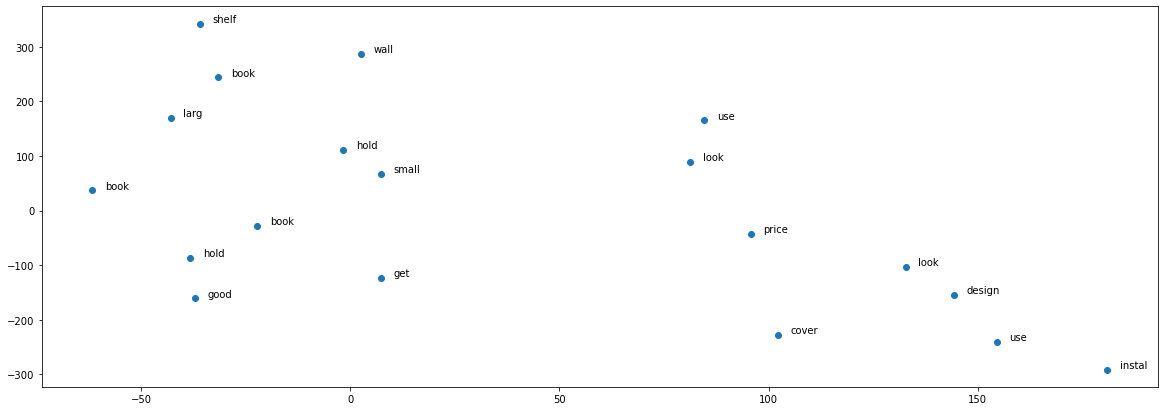

In [186]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

Word Algebra

Since Word2Vec characterizes words into quantified tokens, we can consequently add or subtract word vectors together. To add is to combine the meaning of the components and to subtract is to take out the context of one token from another. The following are examples of this vector algebra and their similarity scores:

In [187]:
#Books + self
word_vec.wv.most_similar(positive=["book", "self"], \
                      negative=[], topn=1)

[('want', 0.742124080657959)]

In [188]:
#Cheap – shelf
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["shelf"], topn=1)

[('weak', 0.21206066012382507)]

Topic Modeling

Because Latent Dirichlet Allocation (LDA) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of electronics product they correspond to. The product reviews will have weights assigned to each of the topic and the topics themselves will have weights on every token. As it is a clustering-based model, LDA is unsupervised and only the num_topics is configurable.

The following are the top five words that are salient to the first group of product reviews.

In [189]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

book 0.051856015
use 0.02291249
bought 0.016378393
hold 0.01636001
shelf 0.01320804
Wall time: 2.3 s


In [190]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 book, 0.051856014877557755
 use, 0.022912489250302315
 bought, 0.01637839339673519
 hold, 0.016360009089112282
 shelf, 0.013208040036261082

Topic 2:
 book, 0.06629782915115356
 wall, 0.03142104297876358
 size, 0.026572000235319138
 shelf, 0.017204804345965385
 fit, 0.01571127027273178

Topic 3:
 book, 0.07721631973981857
 hold, 0.02339780516922474
 size, 0.01803460344672203
 bottom, 0.01599474623799324
 would, 0.015134044922888279

Topic 4:
 book, 0.025913024321198463
 great, 0.01778610609471798
 well, 0.015101063996553421
 instal, 0.01308014988899231
 bought, 0.012918848544359207

Topic 5:
 book, 0.026343829929828644
 realli, 0.020057037472724915
 great, 0.017009710893034935
 easi, 0.015973784029483795
 instal, 0.015826480463147163

Topic 6:
 book, 0.025477660819888115
 screw, 0.024525487795472145
 hold, 0.017931999638676643
 one, 0.017650416120886803
 use, 0.016525790095329285

Topic 7:
 great, 0.05613959580659866
 look, 0.046915411949157715
 book, 0.0311422199010849
 wor

Using pyLDAvis, we can interactively explore the words associated with the topics derived by LDA. The Intertopic Distance Map shows how some product reviews in one topic converge with others due to similarity. If needed, we can adjust the num_topics accordingly to cluster together topic intersections so a more evident decision boundary between classes can be established.

In [191]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_idm = pyLDAvis.gensim_models.prepare(bow_lda, bow, vocabulary)

pyLDAvis.display(lda_idm)

Machine Learning

We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

In [192]:
#Dealing with NaNs
nan_list = model_df[model_df[0].isna()].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[]


Dealing with Unbalanced Data

The distribution of ratings shows that, in general, users highly approve of products bought on Amazon. This however gives us a highly imbalanced dataset.

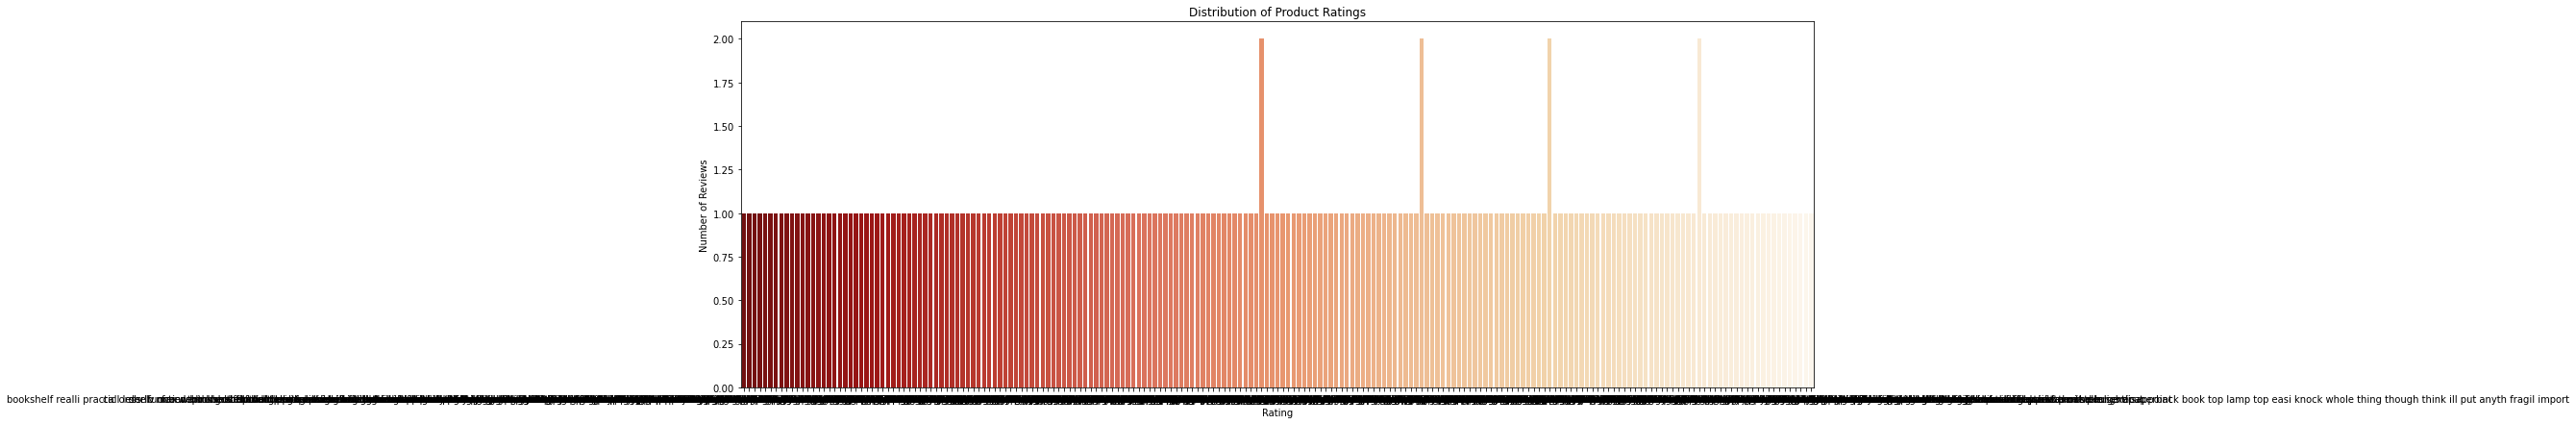

In [193]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["preprocessed"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

Train-Test Split

The y is our target variable or the labels for the data. The X constitutes the features and are the predictor variables.

We evenly split the training and testing sets and stratify to ensure the ratio of classes in both sets are identical.

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

corpus = df['preprocessed']

# convert text into vectors
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(corpus).toarray()

y = df.loc[:, 'classes'].values

x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.5, random_state=42)




Scoring and Baseline

In our study, we will make use of two metrics to measure the model performance:

Accuracy
F1 Score
Accuracy will identify how many reviews are correctly labeled by the model. There are five ratings and thus five classes. No review can have two or more ratings and so the probability that a correct prediction is made from pure guesswork is 20%.

The F1 score is taking precision and recall into consideration. Taking into account false positives and false negatives for each class is especially important in inherently imbalanced datasets.

The baseline scores below are for when a model only randomly guesses the output labels – in this case, when every prediction is the same class. The scores are also based on an evenly distributed dataset.

In [195]:
#from sklearn import metrics

#label_shape = np.shape(y_test)
#y_baseline = np.full(label_shape, 5)

#accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
#f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

#print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
#print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

#y_baseline

In [196]:
#%%time
#from sklearn.ensemble import RandomForestClassifier

#forest = RandomForestClassifier(n_estimators=25, 
                                criterion="entropy", random_state=42)
#forest.fit(X_train, y_train)

IndentationError: unexpected indent (<ipython-input-196-4722a65ca612>, line 5)

In [197]:
#y_pred = forest.predict(X_train)

#accuracy = metrics.accuracy_score(y_train, y_pred)
#f1_score = metrics.f1_score(y_train, y_pred, average="micro")

#print(f"Training Set Accuracy: {accuracy*100:.3f}%")
#print(f"Training Set F1 Score: {f1_score:.3f}")

In [198]:
# performance mesurement

#def model_performane(y_test, y_pred):
 #   print(confusion_matrix(y_test, y_pred))
 #   print(classification_report(y_test, y_pred))

In [199]:
#model_performane(y_test,y_pred)

In [200]:
# from sklearn.metrics import confusion_matrix

# #create the confusion matrix of the training set
# confusion_train = confusion_matrix(y_train, y_pred)
# confusion_train = confusion_train.astype("float") / \
#                    confusion_train.sum(axis=1)[:, np.newaxis]
# confusion_train = np.around(confusion_train, decimals=3)*100

# #create confusion matrix heat map
# f, axes = plt.subplots(figsize=(20,10))
# im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

# axes.figure.colorbar(im, ax=axes)
# axes.set(title="Confusion Matrix for Training Set", \
#          xticks=np.arange(confusion_train.shape[1]), \
#          yticks=np.arange(confusion_train.shape[0]), \
#          xticklabels=range(1, 6), yticklabels=range(1, 6), \
#          xlabel="Predicted", ylabel="Truth")

# #add clear annotations to the confusion matrix
# threshold = confusion_train.max()/1.5
# for i in range(confusion_train.shape[0]):
#     for j in range(confusion_train.shape[1]):
#         axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
#                 ha="center", va="center",
#                 color="white" if confusion_train[i, j] > threshold else "black")
# f.tight_layout()
# plt.show()

In [201]:
# from sklearn.model_selection import cross_val_score

# cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
#                                cv=3, scoring="accuracy")
# cross_val_f1 = cross_val_score(forest, X_train, y_train, \
#                                cv=3, scoring="f1_micro")

# cross_val_accuracy = np.mean(cross_val_accuracy)
# cross_val_f1 = np.mean(cross_val_f1)

# print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
# print(f"Training Set F1 Score: {cross_val_f1:.3f}")

In [202]:
# %%time
# import xgboost as xgb

# y_train_shifted = y_train-1
# y_test_shifted = y_test-1

# train_set = xgb.DMatrix(X_train, label=y_train_shifted)
# test_set = xgb.DMatrix(X_test, label=y_test_shifted)

# parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
#               "objective": "multi:softprob", "num_class": 5}

# boost = xgb.train(parameters, train_set, 100)

In [203]:
# y_pred = boost.predict(train_set)
# y_pred = y_pred.argmax(axis=1)
# y_pred = y_pred+1

# accuracy = metrics.accuracy_score(y_train, y_pred)
# f1_score = metrics.f1_score(y_train, y_pred, average="micro")

# print(f"Training Set Accuracy: {accuracy*100:.3f}%")
# print(f"Training Set F1 Score: {f1_score:.3f}")

In [204]:
# #create the confusion matrix of the training set
# confusion_train = confusion_matrix(y_train, y_pred)
# confusion_train = confusion_train.astype("float") / \
#                    confusion_train.sum(axis=1)[:, np.newaxis]
# confusion_train = np.around(confusion_train, decimals=3)*100

# #create confusion matrix heat map
# f, axes = plt.subplots(figsize=(20,10))
# im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

# axes.figure.colorbar(im, ax=axes)
# axes.set(title="Confusion Matrix for Training Set", \
#          xticks=np.arange(confusion_train.shape[1]), \
#          yticks=np.arange(confusion_train.shape[0]), \
#          xticklabels=range(1, 6), yticklabels=range(1, 6), \
#          xlabel="Predicted", ylabel="Truth")

# #add clear annotations to the confusion matrix
# threshold = confusion_train.max()/1.5
# for i in range(confusion_train.shape[0]):
#     for j in range(confusion_train.shape[1]):
#         axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
#                 ha="center", va="center",
#                 color="white" if confusion_train[i, j] > threshold else "black")
# f.tight_layout()
# plt.show()

In [205]:
# %%time
# boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
#                   num_boost_round=50, early_stopping_rounds=10, \
#                   metrics="merror", as_pandas=True, seed=42)

# display(boost_cv.head())

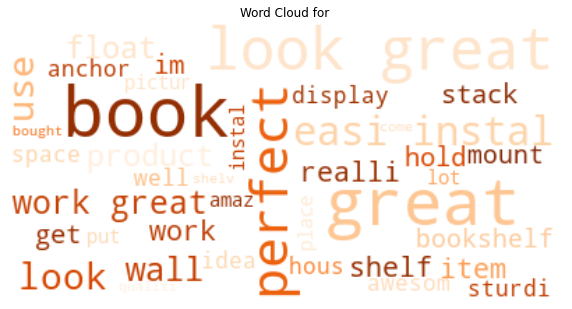

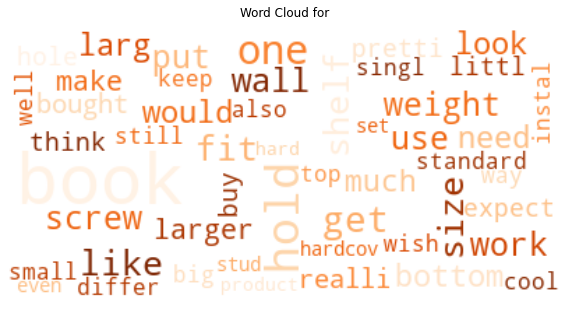

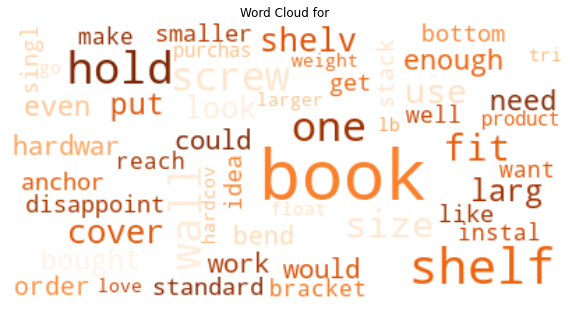

In [206]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

good_text = " ".join(df[df["classes"]=='good']["preprocessed"].values).lower()
moderate_text = " ".join(df[df["classes"]=='moderate']["preprocessed"].values).lower()
bad_text = " ".join(df[df["classes"]=='bad']["preprocessed"].values).lower()


text_list = [good_text,moderate_text,bad_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for ")
    plt.axis("off")
    plt.show()